In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import time

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
X_train,X_test,y_train,y_test = train_test_split(df[iris.feature_names], df['target'], test_size = 0.2, random_state = 42)

Model Fitting Using cross_val_score

In [4]:
max_depth = [3,5,10,None]
acc_cross = []
times = []
for i in max_depth:
    clf_cross = DecisionTreeClassifier(max_depth = i, random_state = 42)
    t0 = time.process_time()
    scores = cross_val_score(clf_cross,X_train,y_train, cv =10)
    t1 = time.process_time()
    acc_cross.append(scores.mean())
    times.append(t1 - t0)

In [5]:
for depth, acc, t in zip(max_depth, acc_cross, times):
    print("For %r depth of tree, Accuracy is %0.3f in %0.4f seconds" %(depth,acc,t))

For 3 depth of tree, Accuracy is 0.933 in 0.0156 seconds
For 5 depth of tree, Accuracy is 0.908 in 0.0312 seconds
For 10 depth of tree, Accuracy is 0.925 in 0.0156 seconds
For None depth of tree, Accuracy is 0.925 in 0.0312 seconds


Text(0, 0.5, 'Cross Validation Score Mean Accuracy(%)')

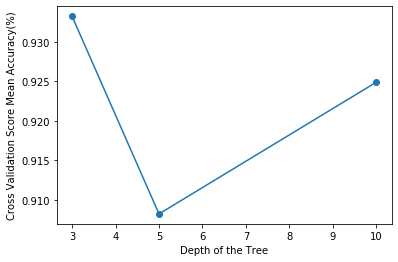

In [6]:
%matplotlib inline
plt.plot(max_depth,acc_cross,"-o")
plt.xlabel('Depth of the Tree')
plt.ylabel('Cross Validation Score Mean Accuracy(%)')